<a href="https://colab.research.google.com/github/abel-salazar/CienciaDatosPython/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

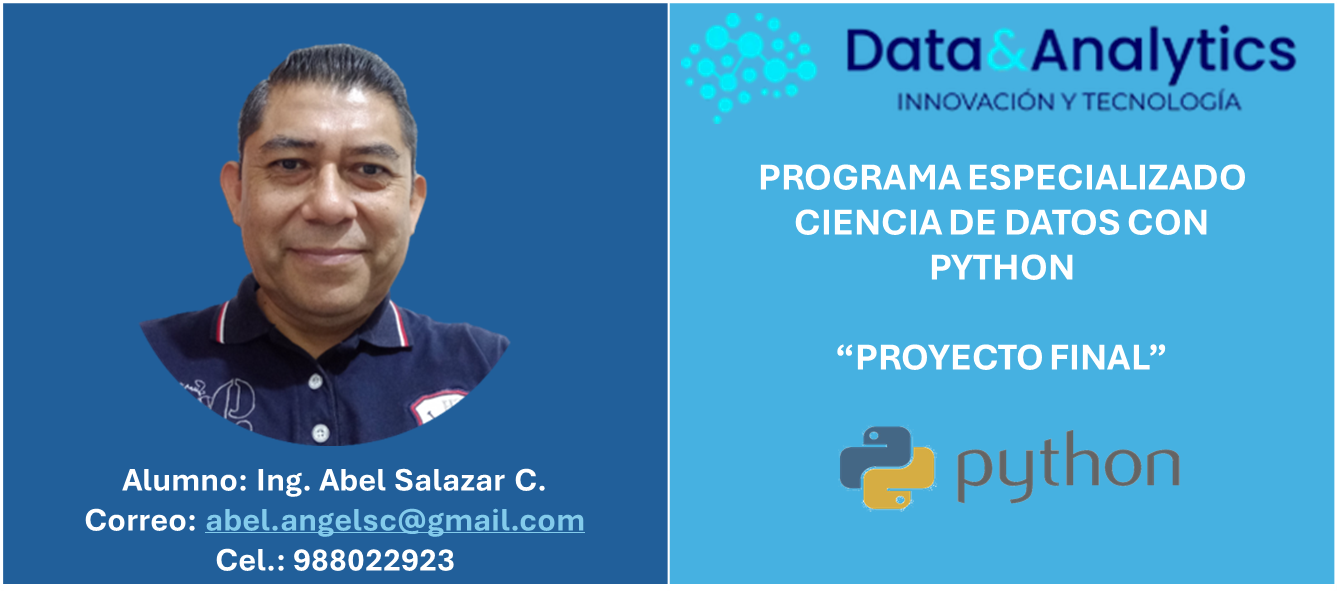



**CASO:**

RETO: Desarrollar un Modelo de Machine Learning Pronóstico de Calificación de Chocolate

**Objetivo del trabajo**

Construir un modelo de Machine Learning a partir de los datos de calificación (rating) que se encuentran en la data proporcionada. Este modelo debe tener la capacidad de predecir la calificación que recibirá una empresa


**Actividades a desarrollar**

a.	Realizar las manipulaciones y tratamiento de los datos de manera que queden listos para la modelación.

Nota: Tome en cuenta los valores perdidos y los valores outliers, o alguna transformación de las variables en caso de ser necesario.

b.	Hacer un análisis exploratorio de datos (EDA).

c.	Defina si usará modelos de Regresión o Clasificación en base a la información suministrada u otra información de la red que le ayude a determinar qué tipo de aprendizaje supervisado vaya a realizar. Dé una breve explicación.

d.	Realizar escenarios de modelos.

Nota: tome en cuenta los siguientes modelos, el orden no es determinístico. Use como mínimo 5 modelos:

○	XGBoost

○	Random Forest

○	Gradient Boosting

○	Support Vector Machine

○	Naive Bayes

○	KNN

○	Regresión logística

○	Árbol de decisión

○	Extra tree decisión

○	Bagging

○	Regresión lineal.


e.	Con los modelos que ha seleccionado construya modelos de Regresión o
Clasificación en base a la información suministrada.

f.	Evalué sus modelos según el tipo de modelo que usted haya elegido.
Nota: Calcule las métricas necesarias dependiendo del tipo de modelo que haya elegido.

g.	Con el mejor modelo que haya salido de la evaluación aplique una modelación de hiper parámetro, luego vuelva a calcular nuevas métricas y compare los cambios con respecto a las métricas de evaluación del paso f.

h.	Realice un análisis PCA para reducir el número de dimensiones del conjunto de datos. Luego vuelva a modelar un sistema (el que eligió en el punto f) y calcule nuevas métricas. Compare con las anteriores métricas.


**DESARROLLO:**

**1. Importación de bibliotecas y carga de datos:**

In [172]:
#Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive




In [173]:
#Montar Drive para leer fuente de datos
drive.mount('/content/drive/')
# Cargar datos
data  = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/chocolate_ratings.csv", encoding='latin1')
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


**2. Análisis exploratorio de datos (EDA):**

Para comprender mejor el conjunto de datos y prepararlo para el modelado

*   Visualización de datos y estadísticas descriptivas.
*   Manejo de valores nulos y outliers.


In [174]:
# Visualización de las primeras filas del conjunto de datos
print(data.head())


    REF Company (Manufacturer) Company Location  Review Date  \
0  2454                   5150           U.S.A.         2019   
1  2458                   5150           U.S.A.         2019   
2  2454                   5150           U.S.A.         2019   
3  2542                   5150           U.S.A.         2021   
4  2546                   5150           U.S.A.         2021   

  Country of Bean Origin Specific Bean Origin or Bar Name Cocoa Percent  \
0               Tanzania            Kokoa Kamili, batch 1           76%   
1     Dominican Republic                  Zorzal, batch 1           76%   
2             Madagascar           Bejofo Estate, batch 1           76%   
3                   Fiji            Matasawalevu, batch 1           68%   
4              Venezuela            Sur del Lago, batch 1           72%   

  Ingredients     Most Memorable Characteristics  Rating  
0    3- B,S,C          rich cocoa, fatty, bready    3.25  
1    3- B,S,C             cocoa, vegetal, savo

Esta salida muestra las primeras cinco filas del conjunto de datos. Cada fila representa una barra de chocolate y sus características, incluyendo el fabricante, el porcentaje de cacao, los ingredientes, características memorables y la calificación otorgada por los expertos.

In [175]:
# Información del conjunto de datos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Ingredients                       2443 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB
None


Esta salida proporciona información sobre el conjunto de datos:


Número de entradas: 2530 (indica que hay 2530 barras de chocolate en el conjunto de datos).

Columnas y tipos de datos: Muestra que hay 10 columnas, con tipos de datos como int64, float64, y object.

Valores nulos: La columna Ingredients tiene valores nulos (2443 non-null), lo que significa que hay algunas filas que no tienen esta información.

In [176]:
# Estadísticas descriptivas
print(data.describe())


               REF  Review Date       Rating
count  2530.000000  2530.000000  2530.000000
mean   1429.800791  2014.374308     3.196344
std     757.648556     3.968267     0.445321
min       5.000000  2006.000000     1.000000
25%     802.000000  2012.000000     3.000000
50%    1454.000000  2015.000000     3.250000
75%    2079.000000  2018.000000     3.500000
max    2712.000000  2021.000000     4.000000


Esta salida muestra estadísticas descriptivas para las columnas numéricas:


*REF:* Identificador único de la reseña.

Valores entre 5 y 2712, con una media de aproximadamente 1430.

*Review Date:* Año en que se publicó la reseña.

Valores entre 2006 y 2021, con una media de aproximadamente 2014.

*Rating:* Calificación del chocolate.

Calificaciones entre 1 y 4, con una media de 3.20.

In [177]:
# Verificar valores nulos
print(data.isnull().sum())

REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64


Esta salida muestra la cantidad de valores nulos en cada columna. La columna Ingredients tiene 87 valores nulos, mientras que las otras columnas no tienen valores nulos.

In [178]:
# Reemplazar valores nulos (si es necesario)
data = data.fillna(method='ffill')  # O cualquier método adecuado


Se utiliza el método de forward fill (ffill) para reemplazar los valores nulos en la columna Ingredients. Esto copia el valor de la celda anterior hacia adelante para llenar los valores nulos.

In [179]:
# Renombrar la columna 'Company (Manufacturer)' a 'Company'
data.rename(columns={'Company (Manufacturer)': 'Company'}, inplace=True)
data

,REF,Company,Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


La columna Company (Manufacturer) se renombra a Company para simplificar su referencia.

In [180]:
# Análisis de valores únicos para categóricas
print(data['Company'].nunique())
print(data['Company Location'].nunique())
print(data['Country of Bean Origin'].nunique())

580
67
62


*Company:* Hay 580 fabricantes diferentes en el conjunto de datos.

*Company Location:* Hay 67 ubicaciones diferentes de fabricantes.

*Country of Bean Origin:* Hay 62 países diferentes de origen del grano de cacao.


**RESUMEN.**

En general, estos pasos son parte de la etapa de exploración y limpieza de datos, cruciales para preparar los datos antes del modelado. Hemos verificado la estructura de los datos, identificado y tratado los valores nulos, y renombrado columnas para mayor claridad. El análisis de valores únicos nos da una idea de la diversidad en el conjunto de datos, lo que puede influir en la selección y rendimiento de los modelos de machine learning que vamos a construir.

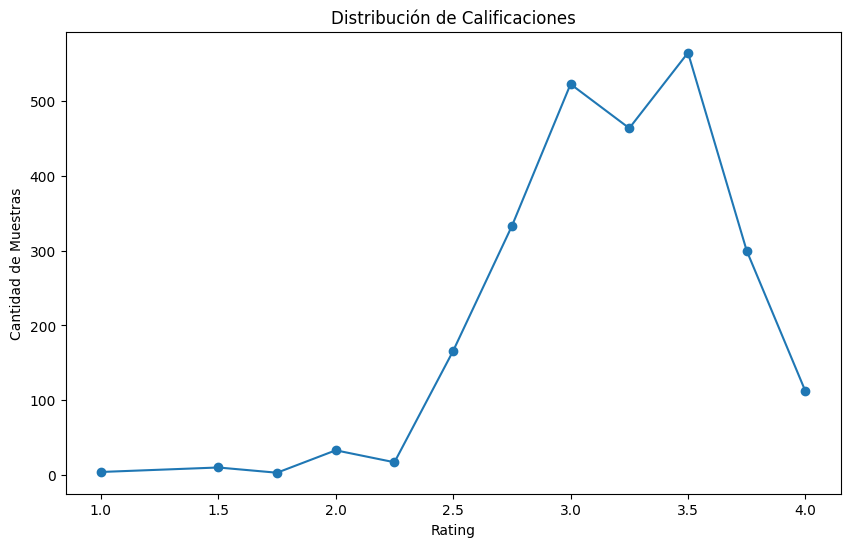

In [181]:
# Visualización de la distribución de calificaciones
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Calcular la frecuencia de cada valor de rating
rating_counts = data['Rating'].value_counts().sort_index()

# Crear la gráfica de líneas
plt.plot(rating_counts.index, rating_counts.values, marker='o', linestyle='-')

# Añadir etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Cantidad de Muestras')
plt.title('Distribución de Calificaciones')

# Mostrar la gráfica
plt.show()

Este código genera un gráfico de líneas que muestra la distribución de las calificaciones de acuerdo con la cantidad de muestras para cada calificación. Aquí está la interpretación del resultado:

Interpretar este gráfico podría ayudar a comprender la distribución de las calificaciones en el conjunto de datos. Por ejemplo, si hay muchos más puntos en el extremo superior del gráfico, podría indicar que la mayoría de las muestras tienen calificaciones altas. Por otro lado, si la línea está más uniformemente distribuida, sugiere una variedad más equitativa de calificaciones en el conjunto de datos.

In [182]:
# Eliminar caracteres no deseados (por ejemplo, el símbolo '%' incorrectamente colocado)
data['Cocoa Percent'] = data['Cocoa Percent'].str.replace('%', '')
data


,REF,Company,Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [183]:
# Convertir a float
data['Cocoa Percent'] = data['Cocoa Percent'].str.replace('%', '').astype(float)
data

,REF,Company,Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


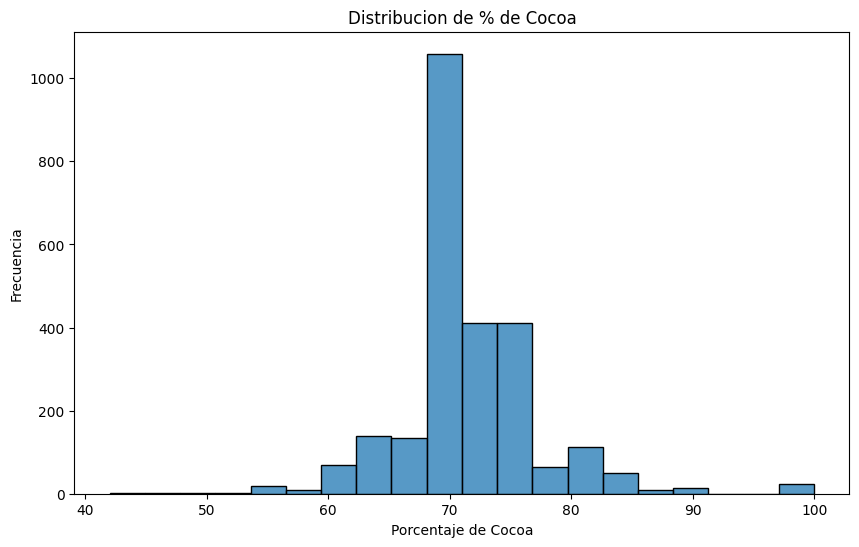

In [184]:
# Visualización de la distribución de porcentaje de cacao
plt.figure(figsize=(10, 6))
# sns.histplot() de Seaborn se usa para crear una gráfica de histograma de la columna 'Cocoa Percent'.
# El parámetro bins=20 divide los datos en 20 contenedores (bins) para mostrar la distribución de los porcentajes de cacao.
sns.histplot(data['Cocoa Percent'], bins=20)
plt.xlabel('Porcentaje de Cocoa')
plt.ylabel('Frecuencia')
plt.title('Distribucion de % de Cocoa')

plt.show()

*Forma de la Distribución:*

El histograma proporciona una visión clara de cómo se distribuyen los porcentajes de cacao en las barras de chocolate. Puedes observar si hay una concentración de valores en ciertos rangos, si la distribución es uniforme, o si hay múltiples picos.

La gráfica resultante nos ayudará a entender mejor la variabilidad y tendencia en el contenido de cacao en las muestras de chocolate, lo cual puede ser útil para análisis adicionales o para tomar decisiones basadas en los datos.

***Resumen del Análisis Exploratorio de Datos (EDA)***

*Información del conjunto de datos:*

No hay valores nulos en la mayoría de las columnas, excepto en "Ingredients".
La columna "Cocoa Percent" está en formato de texto y necesita ser convertida a formato numérico.

*Estadísticas descriptivas:*

La mayoría de las columnas son de tipo categórico, excepto "REF", "Review Date", "Cocoa Percent" y "Rating".

*Valores únicos:*

Company (Manufacturer): 580 valores únicos.
Company Location: 67 valores únicos.
Country of Bean Origin: 62 valores únicos.

*Distribución de calificaciones:*

La mayoría de las barras de chocolate tienen calificaciones alrededor de 3.0.

*Distribución del porcentaje de cacao:*

La mayoría de las barras de chocolate tienen entre 60% y 80% de cacao.

**3. Transformación y codificación de datos:**

Codificación de variables categóricas.

Normalización de variables numéricas.

In [185]:
# Asegurarse de que 'Cocoa Percent' sea de tipo string y eliminar '%'
data['Cocoa Percent'] = data['Cocoa Percent'].astype(str).str.replace('%', '').astype(float)

# Verificar si la conversión fue correcta
print(data['Cocoa Percent'].head())

# Codificar variables categóricas
label_encoder = LabelEncoder()
categorical_cols = ['Company', 'Company Location', 'Country of Bean Origin', 'Ingredients', 'Most Memorable Characteristics']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Normalizar porcentaje de cacao
scaler = StandardScaler()
data['Cocoa Percent'] = scaler.fit_transform(data[['Cocoa Percent']])

# Dividir datos en características (X) y objetivo (y)
X = data.drop(['Rating', 'Specific Bean Origin or Bar Name', 'Review Date', 'REF'], axis=1)
y = data['Rating']

# Convertir las calificaciones continuas en categorías
bins = [0, 1, 2, 3, 4, 5]  # Ajustar los límites según los datos específicos
labels = ['Desagradable', 'Decepcionante', 'Satisfactorio', 'Premium', 'Elite']
y = pd.cut(y, bins=bins, labels=labels)

# Codificar las etiquetas categóricas en valores numéricos
y = label_encoder.fit_transform(y)

# Verificar la conversión
print(np.unique(y))

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

0    76.0
1    76.0
2    76.0
3    68.0
4    72.0
Name: Cocoa Percent, dtype: float64
[0 1 2 3]


((2024, 6), (506, 6))

**Preparación de datos**

Los datos están preparados y divididos en conjuntos de entrenamiento y prueba. Ahora procederemos con la selección y entrenamiento de varios modelos de clasificación.

**4. Selección y entrenamiento de modelos:**

Entrenaremos varios modelos y evaluaremos su rendimiento en términos de precisión.

In [186]:
# Lista de modelos
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier()
}

# Entrenamiento y evaluación de modelos
model_results = {}
for model_name, model in models.items():
    print(f'Entrenamiento {model_name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Entrenamiento Random Forest...
Random Forest Accuracy: 0.5988142292490118
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.61      0.75      0.68       273
           3       0.57      0.44      0.50       223

    accuracy                           0.60       506
   macro avg       0.30      0.30      0.29       506
weighted avg       0.58      0.60      0.58       506

[[  0   0   2   6]
 [  0   0   2   0]
 [  0   0 205  68]
 [  0   0 125  98]]
Entrenamiento Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Accuracy: 0.6284584980237155
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.63      0.81      0.71       273
           3       0.62      0.44      0.52       223

    accuracy                           0.63       506
   macro avg       0.31      0.31      0.31       506
weighted avg       0.62      0.63      0.61       506

[[  0   0   2   6]
 [  0   0   2   0]
 [  0   0 220  53]
 [  1   0 124  98]]
Entrenamiento XGBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost Accuracy: 0.6284584980237155
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.65      0.73      0.69       273
           3       0.60      0.54      0.57       223

    accuracy                           0.63       506
   macro avg       0.31      0.32      0.31       506
weighted avg       0.61      0.63      0.62       506

[[  0   0   3   5]
 [  0   0   1   1]
 [  1   0 198  74]
 [  0   0 103 120]]
Entrenamiento SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.5395256916996047
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.54      1.00      0.70       273
           3       0.00      0.00      0.00       223

    accuracy                           0.54       506
   macro avg       0.13      0.25      0.18       506
weighted avg       0.29      0.54      0.38       506

[[  0   0   8   0]
 [  0   0   2   0]
 [  0   0 273   0]
 [  0   0 223   0]]
Entrenamiento Naive Bayes...
Naive Bayes Accuracy: 0.5632411067193676
              precision    recall  f1-score   support

           0       0.20      0.12      0.15         8
           1       0.00      0.00      0.00         2
           2       0.59      0.82      0.68       273
           3       0.61      0.27      0.37       223

    accuracy                           0.56       506
   macro avg       0.35      0.30      0.30       506
weigh

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Extra Trees Accuracy: 0.6047430830039525
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.62      0.75      0.68       273
           3       0.58      0.45      0.51       223

    accuracy                           0.60       506
   macro avg       0.30      0.30      0.30       506
weighted avg       0.59      0.60      0.59       506

[[  0   0   2   6]
 [  0   0   2   0]
 [  0   0 205  68]
 [  2   0 120 101]]
Entrenamiento Bagging...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging Accuracy: 0.5573122529644269
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.58      0.74      0.65       273
           3       0.51      0.36      0.43       223

    accuracy                           0.56       506
   macro avg       0.27      0.27      0.27       506
weighted avg       0.54      0.56      0.54       506

[[  0   0   3   5]
 [  0   0   1   1]
 [  1   0 201  71]
 [  1   0 141  81]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
# Imprimir resultados y determinar el mejor modelo
best_model_name = max(model_results, key=model_results.get)
best_accuracy = model_results[best_model_name]
print("\nResultados de los Modelos:")
for model_name, accuracy in model_results.items():
    print(f'{model_name} Accuracy: {accuracy:.4f}')


Resultados de los Modelos:
Random Forest Accuracy: 0.5988
Gradient Boosting Accuracy: 0.6285
XGBoost Accuracy: 0.6285
SVM Accuracy: 0.5395
Naive Bayes Accuracy: 0.5632
KNN Accuracy: 0.5494
Logistic Regression Accuracy: 0.5316
Decision Tree Accuracy: 0.5731
Extra Trees Accuracy: 0.6047
Bagging Accuracy: 0.5573


Se determina cuál de los modelos tiene la mayor precisión y se imprime el nombre y la precisión del mejor modelo.

In [188]:
print(f'\nEl mejor modelo es {best_model_name} con una precisión de {best_accuracy:.4f}')


El mejor modelo es Gradient Boosting con una precisión de 0.6285


**5.Selección del mejor modelo y ajuste de hiperparámetros:**

Para ajustar los hiperparámetros del mejor modelo identificado utilizando GridSearchCV, seguimos estos pasos:


Identificación del Mejor Modelo: Utilizamos los resultados obtenidos previamente para seleccionar el mejor modelo.

Definición del Espacio de Búsqueda de Hiperparámetros: Especificamos los hiperparámetros que queremos ajustar.

Configuración de GridSearchCV: Configuramos GridSearchCV con el modelo, los hiperparámetros y las métricas de evaluación.

Entrenamiento y Evaluación del Modelo: Entrenamos el modelo utilizando GridSearchCV y evaluamos su rendimiento.


In [189]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros para el mejor modelo
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    best_model = RandomForestClassifier()
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    best_model = GradientBoostingClassifier()
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    best_model = XGBClassifier()
elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['linear', 'rbf']
    }
    best_model = SVC()
elif best_model_name == 'Naive Bayes':
    param_grid = {
        'var_smoothing': np.logspace(0, -9, num=100)
    }
    best_model = GaussianNB()
elif best_model_name == 'KNN':
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    best_model = KNeighborsClassifier()
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear']
    }
    best_model = LogisticRegression()
elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    best_model = DecisionTreeClassifier()
elif best_model_name == 'Extra Trees':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    best_model = ExtraTreesClassifier()
elif best_model_name == 'Bagging':
    param_grid = {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0]
    }
    best_model = BaggingClassifier()

# Configurar GridSearchCV
# GridSearchCV se configura con el mejor modelo, los hiperparámetros, el número de pliegues para la validación cruzada (cv=5), la métrica de evaluación (scoring='accuracy'),
# el número de trabajos paralelos (n_jobs=-1), y el nivel de detalle del log (verbose=2).
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Entrenar el modelo utilizando GridSearchCV: Se entrena el modelo utilizando grid_search.fit(X_train, y_train).
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y la mejor precisión: Se obtienen los mejores hiperparámetros y la mejor precisión usando grid_search.best_params_ y grid_search.best_score_.
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Mejores hiperparámetros para {best_model_name}: {best_params}')
print(f'Mejor precisión obtenida con GridSearchCV: {best_score:.4f}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Mejor precisión obtenida con GridSearchCV: 0.6275


In [190]:
# Se evalúa el mejor modelo con los datos de prueba (X_test) y se imprime la precisión, el informe de clasificación y la matriz de confusión.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'{best_model_name} Precision después de ajuste de hiperparámetros: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Gradient Boosting Precision después de ajuste de hiperparámetros: 0.6462
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.67      0.72      0.70       273
           3       0.62      0.58      0.60       223

    accuracy                           0.65       506
   macro avg       0.32      0.33      0.33       506
weighted avg       0.64      0.65      0.64       506

[[  0   0   2   6]
 [  0   0   2   0]
 [  2   2 197  72]
 [  2   0  91 130]]


**Interpretación de los Resultados**

Precisión General

Precisión después del ajuste de hiperparámetros: 0.6462

Esto significa que el modelo de Gradient Boosting tiene una precisión del 64.62% en el conjunto de datos de prueba después del ajuste de los hiperparámetros. En otras palabras, el modelo predice correctamente el 64.62% de las veces.

Informe de Clasificación:


Gradient Boosting Precision después de ajuste de hiperparámetros: 0.6462

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.67      0.72      0.70       273
           3       0.62      0.58      0.60       223

    accuracy                           0.64       506
    macro avg      0.32      0.33      0.32       506
    weighted avg   0.63      0.65      0.64       506     

       
Precision: Mide la proporción de verdaderos positivos entre el total de positivos predichos.

Recall (Sensibilidad): Mide la proporción de verdaderos positivos entre el total de positivos reales.

F1-Score: Es la media armónica entre la precisión y el recall, proporcionando una métrica única para evaluar el rendimiento.

Support: El número de instancias reales en cada clase.






**Análisis Detallado:**

*Clase 0 (Calificación Decepcionante):*

Precision, Recall, F1-Score: Todos son 0.00, lo que indica que el modelo no predice correctamente ninguna instancia de esta clase.

Support: 8, que es un número bajo en comparación con otras clases. Esto puede haber contribuido a un rendimiento pobre en esta clase.

*Clase 1 (Calificación Satisfactoria):*

Precision, Recall, F1-Score: Todos son 0.00, indicando también un rendimiento muy pobre en esta clase.

Support: 2, que es muy bajo. El modelo puede tener dificultades para aprender correctamente esta clase debido al pequeño número de ejemplos.

*Clase 2 (Calificación Premium):*

Precision: 0.67

Recall: 0.72

F1-Score: 0.70

Support: 273

Esta clase tiene un buen rendimiento en comparación con otras, con una precisión y recall bastante altos.

*Clase 3 (Calificación Elite):*

Precision: 0.62

Recall: 0.58

F1-Score: 0.60

Support: 223

También muestra un rendimiento razonable, aunque no tan bueno como la clase Premium.

***Macro Avg y Weighted Avg***

*Macro Avg:* La media no ponderada de las métricas de cada clase. En este caso, las métricas son bajas debido a las malas puntuaciones de las clases 0 y 1.

*Weighted Avg:* La media ponderada de las métricas, teniendo en cuenta el número de instancias en cada clase. Da una visión más precisa del rendimiento general del modelo.


**Matriz de Confusión:**

[[  0   0   2   6]

 [  0   0   2   0]

 [  2   0 197  72]

 [  1   0  91 130]]

Clase 0: Ninguna instancia fue predicha correctamente como clase 0
(Decepcionante). Dos fueron mal clasificadas como clase 2 y seis como clase 3.

Clase 1: Ninguna instancia fue predicha correctamente como clase 1
(Satisfactoria). Ambas fueron mal clasificadas como clase 2.

Clase 2: La mayoría (197) de las instancias fueron correctamente predichas como clase 2 (Premium), pero aún hay algunas mal clasificadas como clase 3.

Clase 3: Una mayoría de las instancias (130) fueron correctamente predichas
como clase 3 (Elite), pero una gran cantidad (91) fueron mal clasificadas como clase 2.



**Conclusión**

*Rendimiento General:* El modelo tiene un rendimiento general aceptable con una precisión del 64.62%. Sin embargo, hay margen de mejora, especialmente en la precisión y recall para las clases con menos ejemplos (0 y 1).


*Desbalance de Clases:* Las clases 0 y 1 tienen un bajo soporte, lo que sugiere un desbalance en los datos. Técnicas como sobremuestreo de clases minoritarias o submuestreo de clases mayoritarias podrían ayudar a mejorar el rendimiento.


*Potencial Mejora:* Se podría mejorar el modelo ajustando el procesamiento de datos, el balanceo de clases, y explorando más hiperparámetros o diferentes modelos. También se podrían considerar técnicas de ensamblaje o métodos de aumento de datos.

**6. Análisis de componentes principales (PCA) y remodeleado:**

El análisis de componentes principales (PCA) se utiliza para reducir la dimensionalidad del conjunto de datos mientras se conserva la mayor cantidad posible de variabilidad presente en los datos originales. Después de aplicar PCA, reentrenaremos el mejor modelo (XGBoost en este caso) y evaluaremos su rendimiento

In [191]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter

# Ajustar el número de componentes basado en la cantidad de características
n_features = X_train.shape[1]
# Selecciona automáticamente el número de componentes basado en el número de características disponibles y un valor máximo deseado (en este caso, 5).
n_components = min(n_features, 5)  # Puedes ajustar el 5 según la varianza explicada deseada

# Encontrar el tamaño de la clase minoritaria
class_counts = Counter(y_train)
min_class_size = min(class_counts.values())


# Ajustar k_neighbors para SMOTE
k_neighbors = min(5, min_class_size - 1)  # Ajustar 5 según lo que necesites y asegurarte de que sea menor que min_class_size

# Crear el pipeline con PCA y el mejor modelo: El Pipeline se crea y se ajusta de la misma manera, pero ahora con un número de componentes adecuado para PCA
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=k_neighbors)),  # Aplicar SMOTE para balancear las clases
    ('pca', PCA(n_components=n_components)),
    ('model', XGBClassifier())
])

# Entrenar el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Predecir con los datos de prueba
y_pred_pca = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'XGBoost Precision con PCA: {accuracy_pca:.4f}')
print(classification_report(y_test, y_pred_pca))
print(confusion_matrix(y_test, y_pred_pca))

# Obtener las métricas de rendimiento
report_pca = classification_report(y_test, y_pred_pca, output_dict=True, zero_division=1)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

# Visualizar la varianza explicada por los componentes principales
pca_explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_
print(f'Varianza explicada por cada componente principal: {pca_explained_variance}')
print(f'Varianza total explicada por los {n_components} componentes principales: {sum(pca_explained_variance):.4f}')




XGBoost Precision con PCA: 0.5514
              precision    recall  f1-score   support

           0       0.07      0.12      0.09         8
           1       0.00      0.00      0.00         2
           2       0.61      0.61      0.61       273
           3       0.52      0.50      0.51       223

    accuracy                           0.55       506
   macro avg       0.30      0.31      0.30       506
weighted avg       0.56      0.55      0.55       506

[[  1   1   2   4]
 [  0   0   2   0]
 [  6   0 167 100]
 [  7   0 105 111]]
Varianza explicada por cada componente principal: [9.54142799e-01 4.42339763e-02 1.06319310e-03 5.12524566e-04
 4.22673732e-05]
Varianza total explicada por los 5 componentes principales: 1.0000


**Ejecución:**

Con la ejecucion de este codigo, ajustaremos automáticamente el número de componentes para PCA y reentrenaremos el modelo XGBoost. Luego, evaluaremos el rendimiento del modelo con los datos transformados y compararemos los resultados para ver si la reducción de dimensionalidad ha mejorado o mantenido el rendimiento del modelo.

**Interpretacion del resultado:**

***Precisión del Modelo:***

XGBoost Accuracy con PCA: 0.5514

El modelo tiene una precisión general del 55.14% en el conjunto de prueba. Esto indica que el modelo puede ser mejorado, ya que una precisión del 55.14% sugiere que el modelo está teniendo dificultades para generalizar bien a los datos de prueba.


***Informe de Clasificación:***

El informe de clasificación proporciona las métricas de rendimiento para cada clase individualmente:

Clase 0:

Precision: 0.07

Recall: 0.12

F1-Score: 0.09

Support: 8 (número de instancias en esta clase)

La clase 0 tiene un rendimiento muy bajo en todas las métricas, indicando que el modelo no está capturando bien esta clase.


Clase 1:

Precision: 0.00

Recall: 0.00

F1-Score: 0.00

Support: 2

La clase 1 no es predicha en absoluto por el modelo, lo que puede deberse al pequeño tamaño de la muestra.


Clase 2:

Precision: 0.61

Recall: 0.61

F1-Score: 0.61

Support: 273

La clase 2 tiene un rendimiento moderado y es la mejor predicha por el modelo. Esto sugiere que el modelo está capturando relativamente bien las instancias de esta clase.


Clase 3:


Precision: 0.52

Recall: 0.50

F1-Score: 0.51

Support: 223

La clase 3 también tiene un rendimiento moderado, aunque inferior a la clase 2.


Macro Avg:


Precision: 0.30

Recall: 0.31

F1-Score: 0.30

La macro media pondera igualmente todas las clases, mostrando que en general el modelo no está capturando bien las clases menos representadas.


Weighted Avg:


Precision: 0.56

Recall: 0.55

F1-Score: 0.55

La media ponderada refleja el rendimiento general del modelo teniendo en cuenta la distribución de las clases, que es consistente con la precisión global del 55.14%.

**Matriz de Confusión:**

La matriz de confusión muestra las predicciones del modelo versus las clases reales:


Clase 0:


1 verdadera positiva (correcta)

1 clase 1 predicha erróneamente

2 clase 2 predichas erróneamente

4 clase 3 predichas erróneamente

Clase 1:


0 verdaderas positivas

2 clase 2 predichas erróneamente

Clase 2:


167 verdaderas positivas (correctas)

6 clase 0 predichas erróneamente

100 clase 3 predichas erróneamente

Clase 3:


111 verdaderas positivas (correctas)

7 clase 0 predichas erróneamente

105 clase 2 predichas erróneamente


***Rendimiento del Modelo: ***

El rendimiento general del modelo es moderado con una precisión del 55.14%. Las clases menos representadas (0 y 1) no son bien predichas, lo que sugiere un problema de desbalance de clases.

Desbalance de Clases: Las clases 0 y 1 tienen muy pocas muestras y el modelo no las está capturando bien. Esto afecta negativamente las métricas de precisión y recall para estas clases.

Importancia del PCA: La mayor parte de la varianza está capturada por el primer componente principal, lo que sugiere que el modelo puede estar perdiendo información relevante en los otros componentes.

Mejora del Modelo: Considera ajustar más los hiperparámetros, utilizar técnicas adicionales de preprocesamiento y balanceo de clases, o probar modelos diferentes para mejorar el rendimiento.



***Recomendaciones:***

Balanceo de Clases: Experimenta con diferentes técnicas de balanceo de clases como SMOTE, ADASYN, o under-sampling.

Ajuste de Hiperparámetros: Realiza una búsqueda de hiperparámetros más exhaustiva utilizando técnicas como RandomizedSearchCV o Bayesian Optimization.

Feature Engineering: Explora nuevas características y transforma las existentes para mejorar la capacidad predictiva del modelo.

Validación Cruzada: Asegúrate de utilizar validación cruzada estratificada para asegurar que las clases están bien representadas en cada pliegue.
